Data Preprocessing

Описание дынных. Исходный датасет имеет 10 переменных.9 первых переменных - это независимые. Последняя переменная "Category" - зависимая переменная. Переменная "Category" состоит из двух типов: 0 и 1, где 0 - это здоровые люди, 1 - заболевшие.
Конвертируем наш документ в формат csv с разделителем "запятая". 
Осуществим подготовку данных, импортировав необходимые библиотеки.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загрузим наш предварительно конвертированный файл.

In [2]:
# Importing the dataset
df = pd.read_csv('CR_2.csv', sep=',')

Выведем данные на экран чтобы убедиться в правильности отображения. Имеем 10 колонок и 615 строк.

In [3]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,6.93,12.1,69.0,0
1,32,m,38.5,70.3,18.0,24.7,11.17,15.6,76.5,0
2,32,m,46.9,74.7,36.2,52.6,8.84,33.2,79.3,0
3,32,m,43.2,52.0,30.6,22.6,7.33,33.8,75.7,0
4,32,m,39.2,74.1,32.6,24.8,9.15,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,5.57,650.9,68.5,1
611,64,f,24.0,102.8,2.9,44.4,1.54,35.9,71.3,1
612,64,f,29.0,87.3,3.5,99.0,1.66,64.2,82.0,1
613,46,f,33.0,NaN,39.0,62.0,3.56,50.0,71.0,1


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


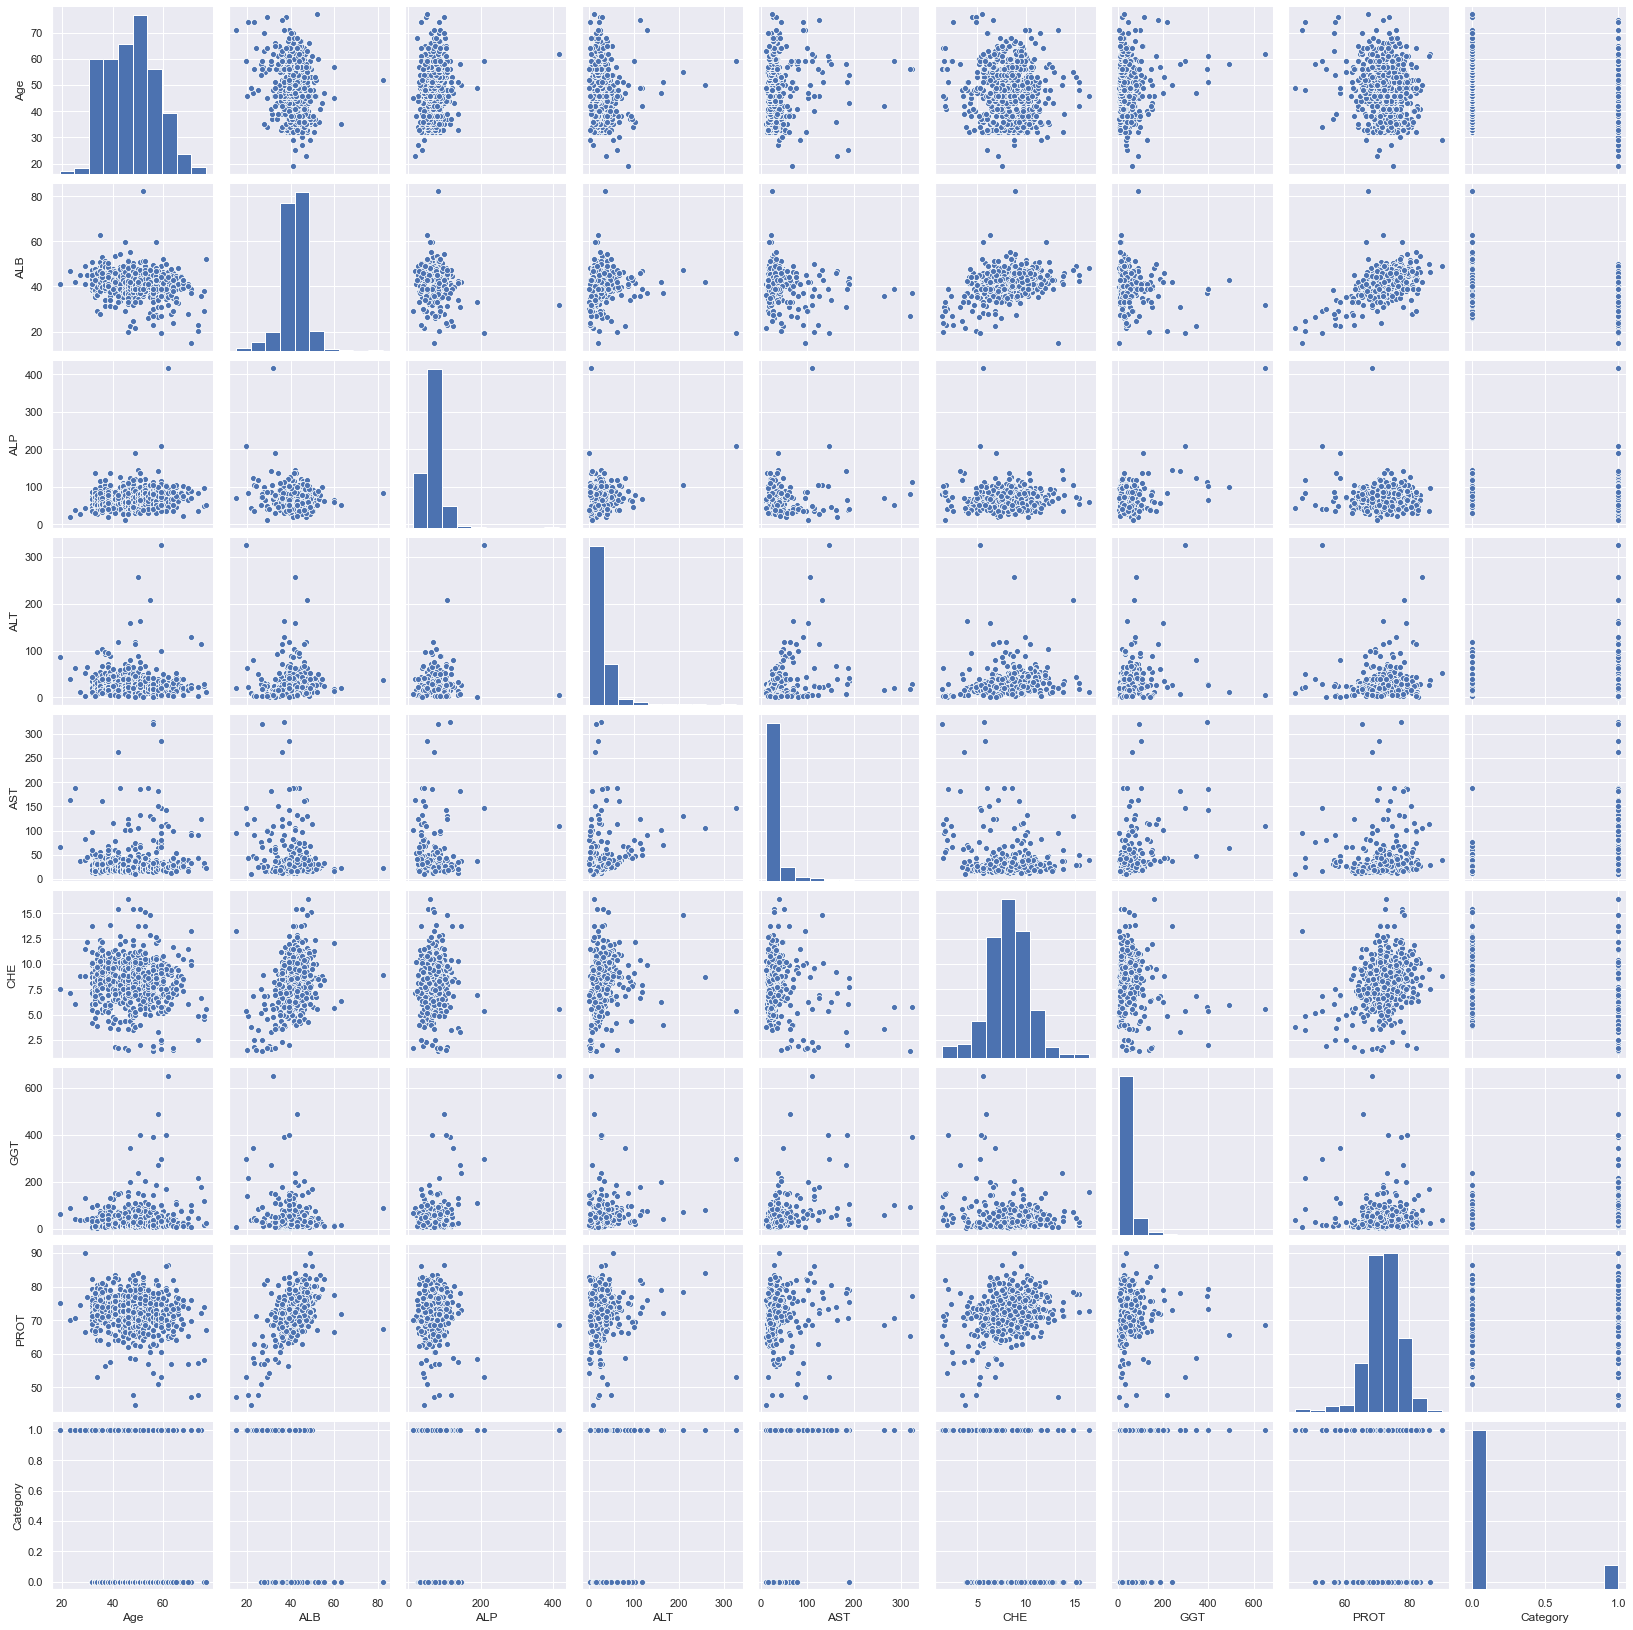

In [4]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

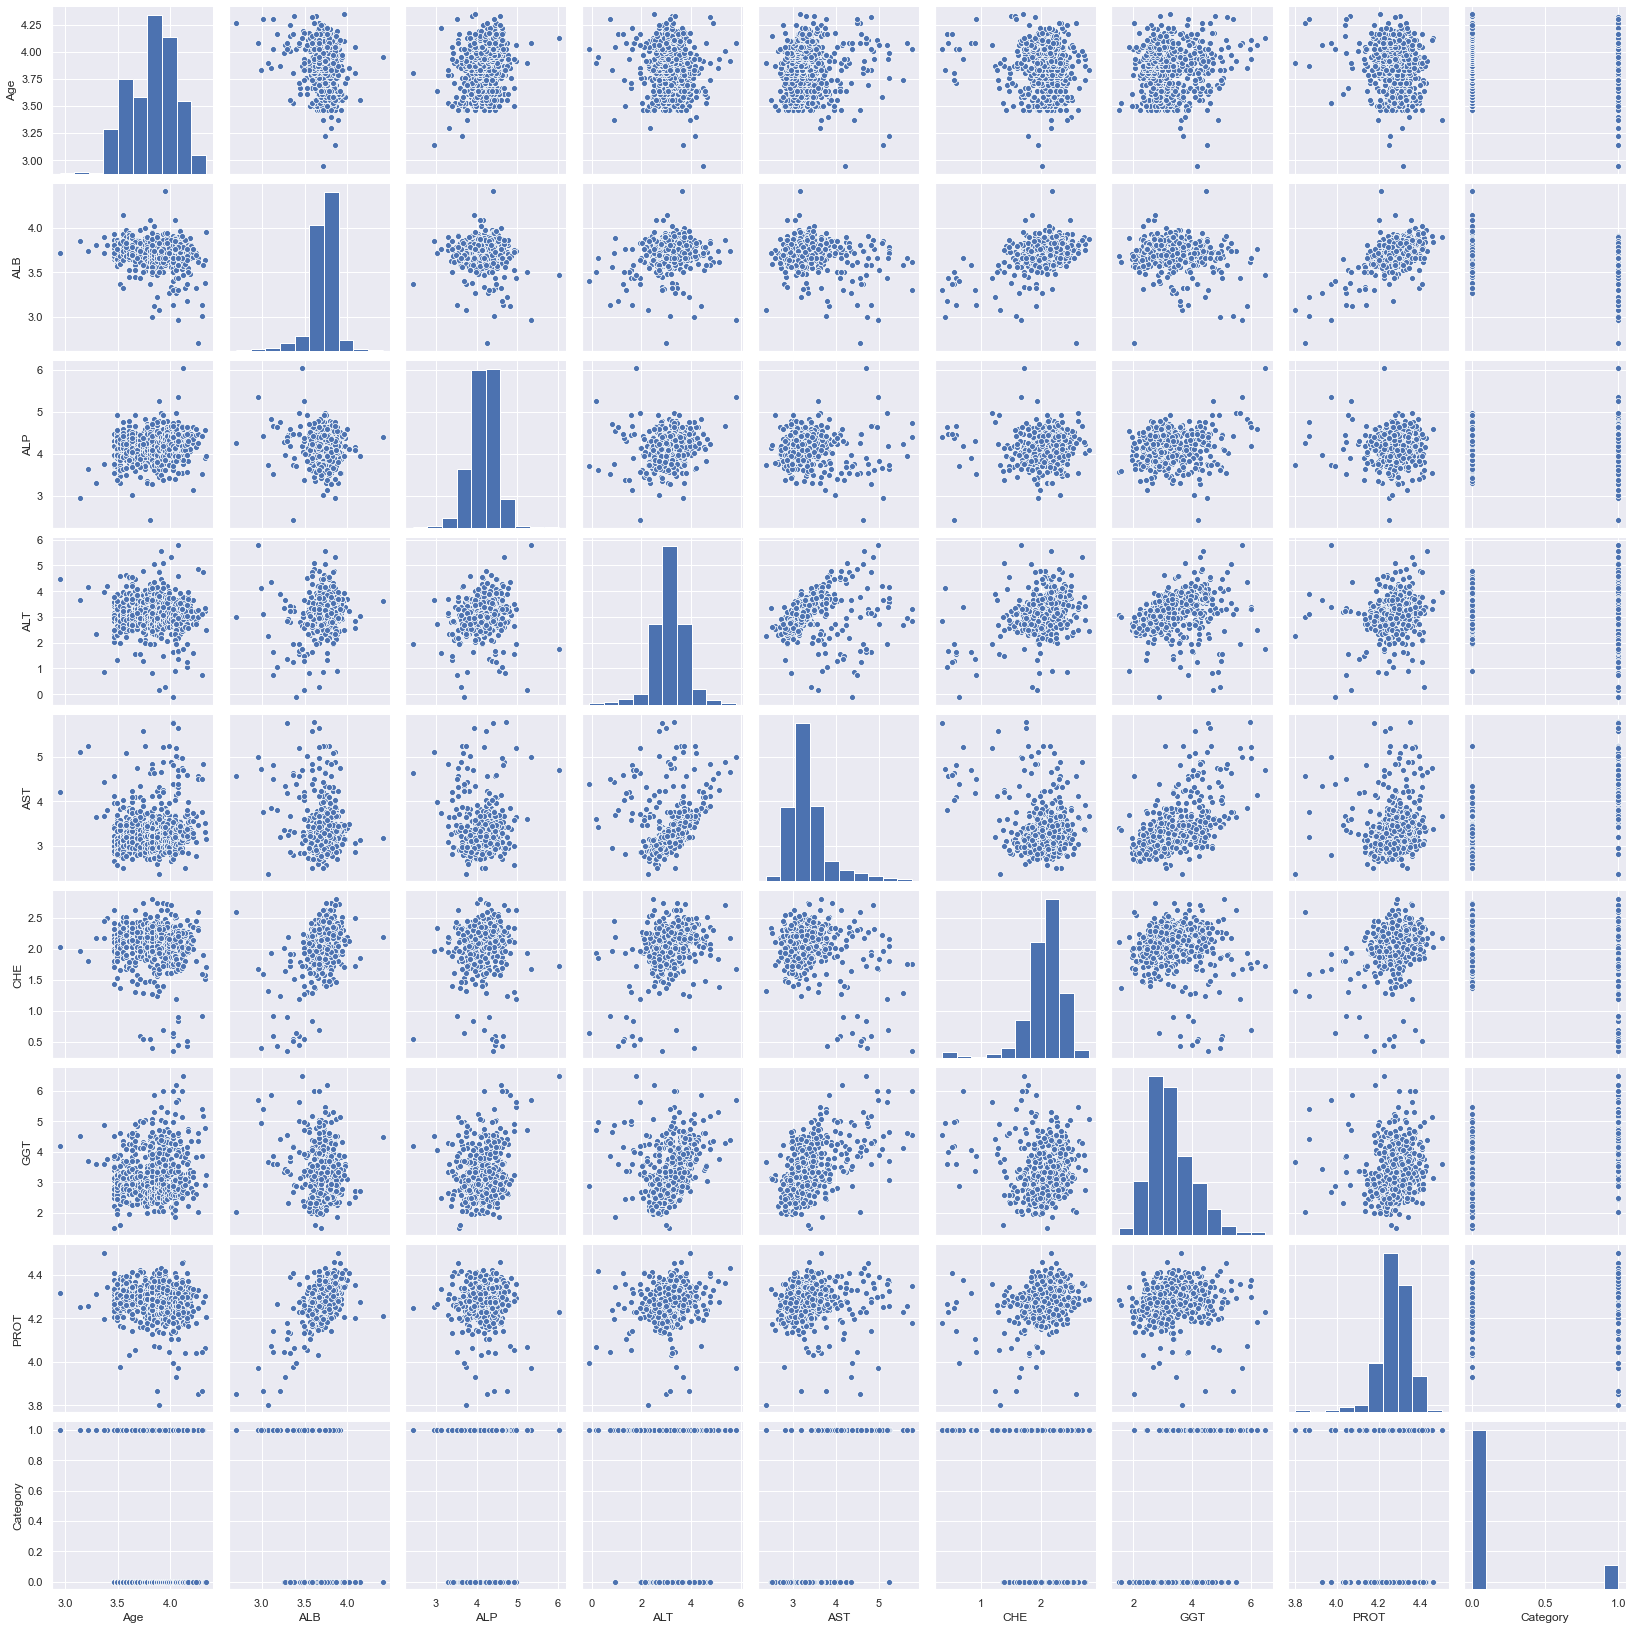

In [5]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Age','ALB','ALP','ALT','AST','CHE','GGT','PROT']] = np.log(df_1[['Age','ALB','ALP','ALT','AST','CHE','GGT','PROT']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Для определения пропущенных значений в переменных выведем общее количество и процент пропусков по переменным. 

In [6]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ALP,18,0.029268
PROT,1,0.001626
ALT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
GGT,0,0.000000
CHE,0,0.000000
AST,0,0.000000
Sex,0,0.000000
Age,0,0.000000


Как видим, есть пропущенные значения. Проведем поиск и подстановку пропущенных значений, при чем имеем картину, что пропуски
присутствуют только в числовых значений. Соответственно произведем поиск и подстановку только числовых значений. 

In [7]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Заполним пропуски полученными значениями. 

In [8]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Заново выведем общее количество и процент пропусков

In [9]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
PROT,0,0.0
GGT,0,0.0
CHE,0,0.0
AST,0,0.0
ALT,0,0.0
ALP,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


Выведем статистику по числовым значениям. Как и следовало ожидать - пропущенных значений нет. 

In [10]:
df.describe()

,Age,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,8.196634,39.533171,72.044137,0.133333
std,10.055105,5.775920,25.643955,25.448940,33.090690,2.205657,54.661071,5.398234,0.340211
min,19.000000,14.900000,11.300000,0.900000,10.600000,1.420000,4.500000,44.800000,0.000000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,6.935000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,8.260000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,9.590000,40.200000,75.400000,0.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,16.410000,650.900000,90.000000,1.000000


В нашем датасете присутствуют качественные переменные - пол. Ее необходимо закодировать с помощью функции.
Запишем список нечисловых переменных и проведем кодирование качественных переменных. Результат запишем обратно в базу.

In [11]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [12]:
# Encoding categorical data
df = encoding_char(df)

Посмотрим, как будут выглядеть наши закодированные данные. Теперь все переменные в ней являются числовыми. 
С ними можно теперь работать.

In [13]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32.0,0,38.5,52.50000,7.7,22.1,6.93,12.1,69.0,0.0
1,32.0,0,38.5,70.30000,18.0,24.7,11.17,15.6,76.5,0.0
2,32.0,0,46.9,74.70000,36.2,52.6,8.84,33.2,79.3,0.0
3,32.0,0,43.2,52.00000,30.6,22.6,7.33,33.8,75.7,0.0
4,32.0,0,39.2,74.10000,32.6,24.8,9.15,29.9,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.0,416.60000,5.9,110.3,5.57,650.9,68.5,1.0
611,64.0,1,24.0,102.80000,2.9,44.4,1.54,35.9,71.3,1.0
612,64.0,1,29.0,87.30000,3.5,99.0,1.66,64.2,82.0,1.0
613,46.0,1,33.0,68.28392,39.0,62.0,3.56,50.0,71.0,1.0


В результате подготовки данных мы получаем подготовленный набор данных, который можно использовать для  дальнешего моделирования.

Осуществлять работу с выбросами мы не будем, т.к.в дальнейшем они могут оказаться значимыми.

Проведем проверку типов данных по переменным и выявим соответствие.

In [14]:
df.dtypes

Age         float64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
CHE         float64
GGT         float64
PROT        float64
Category    float64
dtype: object

Повторно выведем статистику и убедимся, что данные подготовлены и могут использоваться для моделирования. На всякий случай запишем наши данные в новый датасет.

In [15]:
df.describe()

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,0.386992,41.620195,68.283920,28.450814,34.786341,8.196634,39.533171,72.044137,0.133333
std,10.055105,0.487458,5.775920,25.643955,25.448940,33.090690,2.205657,54.661071,5.398234,0.340211
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,1.420000,4.500000,44.800000,0.000000
25%,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,6.935000,15.700000,69.300000,0.000000
50%,47.000000,0.000000,41.900000,66.700000,23.000000,25.900000,8.260000,23.300000,72.200000,0.000000
75%,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,9.590000,40.200000,75.400000,0.000000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,16.410000,650.900000,90.000000,1.000000


Linear Regression

In [16]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32.0,0,38.5,52.50000,7.7,22.1,6.93,12.1,69.0,0.0
1,32.0,0,38.5,70.30000,18.0,24.7,11.17,15.6,76.5,0.0
2,32.0,0,46.9,74.70000,36.2,52.6,8.84,33.2,79.3,0.0
3,32.0,0,43.2,52.00000,30.6,22.6,7.33,33.8,75.7,0.0
4,32.0,0,39.2,74.10000,32.6,24.8,9.15,29.9,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.0,416.60000,5.9,110.3,5.57,650.9,68.5,1.0
611,64.0,1,24.0,102.80000,2.9,44.4,1.54,35.9,71.3,1.0
612,64.0,1,29.0,87.30000,3.5,99.0,1.66,64.2,82.0,1.0
613,46.0,1,33.0,68.28392,39.0,62.0,3.56,50.0,71.0,1.0


Отшкалируем данные, используя MinMaxScaler, переведя наши данные в диапазон от 0 до 1 с округлением.  Используем мин-макс шкалирование т.к. он не внесет никаких дополнительных изменений. Вывыдем результат в таблицу, подписав соответственно названия столбцов.

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Age','Sex','ALB','ALP','ALT','AST','CHE','GGT','PROT','Category']).round()

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
612,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Посмотрим  на метод локтя для алгоритмя к-средних. Это нужно для того, чтобы видеть, сколько кластеров имеет смысл выделить. Прогоним наш алгоритм в цикле от 1 до 11 кластеров.  Посмотрим как будет изменяться функция расстояния от ядра до обх+ъектов кластера и отобразим на графике.

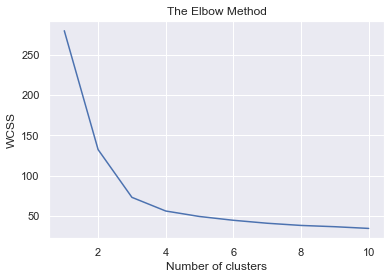

In [18]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Видим, что функция падает при 2х и 3х кластерах, потом на 4м скорость плавно падает. 

Еще один метод для определения оптиального числа кластеров - метод силуэта. Применим для рассчета кластеров от 2х до 7ми. 

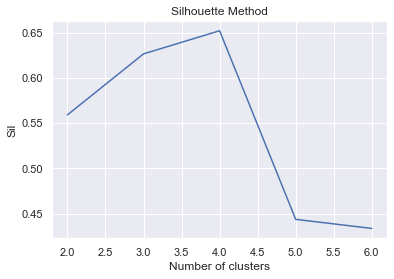

2:0.5589764375288919
3:0.6263846040063648
4:0.6519584331682423
5:0.44354156271281375
6:0.4335337796800933


In [19]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Видим, что максимкальное значение у нас достигается при 4х кластерах, т.к. его значение наибольшее. Далее идет 3 кластера. Поэтому можно попытаться выделить 4 кластера на наштх данных. Применим метод к-средних с 4мя кластерами и выведем ядра в табличку. 

In [20]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALB','ALP','ALT','AST','CHE','GGT','PROT','Category']).round(2)

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,0.49,-0.0,0.42,0.14,0.09,0.06,0.49,0.04,0.61,0.0
1,0.48,1.0,0.39,0.14,0.06,0.04,0.43,0.03,0.59,0.0
2,0.59,1.0,0.32,0.18,0.13,0.23,0.33,0.15,0.65,1.0
3,0.49,0.0,0.34,0.12,0.12,0.26,0.38,0.16,0.57,1.0


Сократим количество переменных до 5ти, оставив наши значимые показатели. Age,Sex,ALB,AST,GGT,PROT,Category, Остальные  Построим на трех кластерах. Обучим на множестве и выведем ядра.

In [21]:
# Less features
X = df[:, [0,1,2,5,7,8,9]]

In [22]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALB','AST','GGT','PROT','Category']).round()

,Age,Sex,ALB,AST,GGT,PROT,Category
0,0.0,-0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0


 Мы получили некую базу для дальнейшего построения нейронной сети в задачах кластеризации.

SOM

Для дальнейшей работы установим библиотеку SimpSOM. Построим базовую сетку. Для этого из импортированной библиотеки используем фукцию somNet и задаем ее параметры. Зададим размерность сетки равной 15х15, т.к. в нашей выборке 615 значений. Пускай обучение проводится с желаемой фиксацией потерь равно 1%. Количество итераций - 1500.

In [23]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 15, X, PBC=True)
net.train(0.01, 1500)
#net.save(‘filename_weights)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


Наша сеть обучилась. 0-й кластер: молодые мужчины с низким показателями "ALB"	"AST" "GGT" и высоким показателем	"PROT" - здоровы. 1-й кластер молодые женщины с низким показателями "ALB"	"AST" "GGT" и высоким показателем	"PROT" - здоровы. 2-ой кластер: мужчины более старшего возраста с низким показателями "ALB"	"AST" "GGT" и высоким показателем	"PROT" относятся к больным.

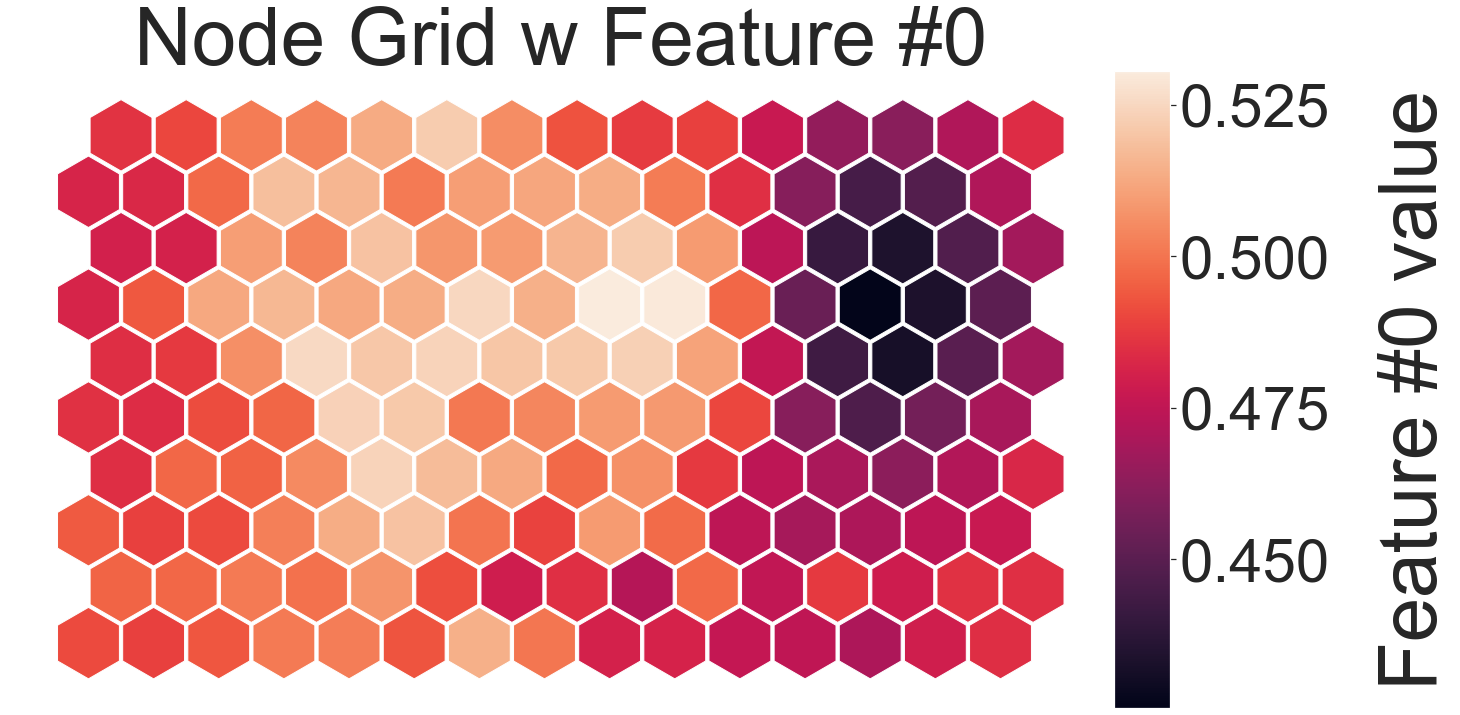

In [24]:
net.nodes_graph(colnum=0)

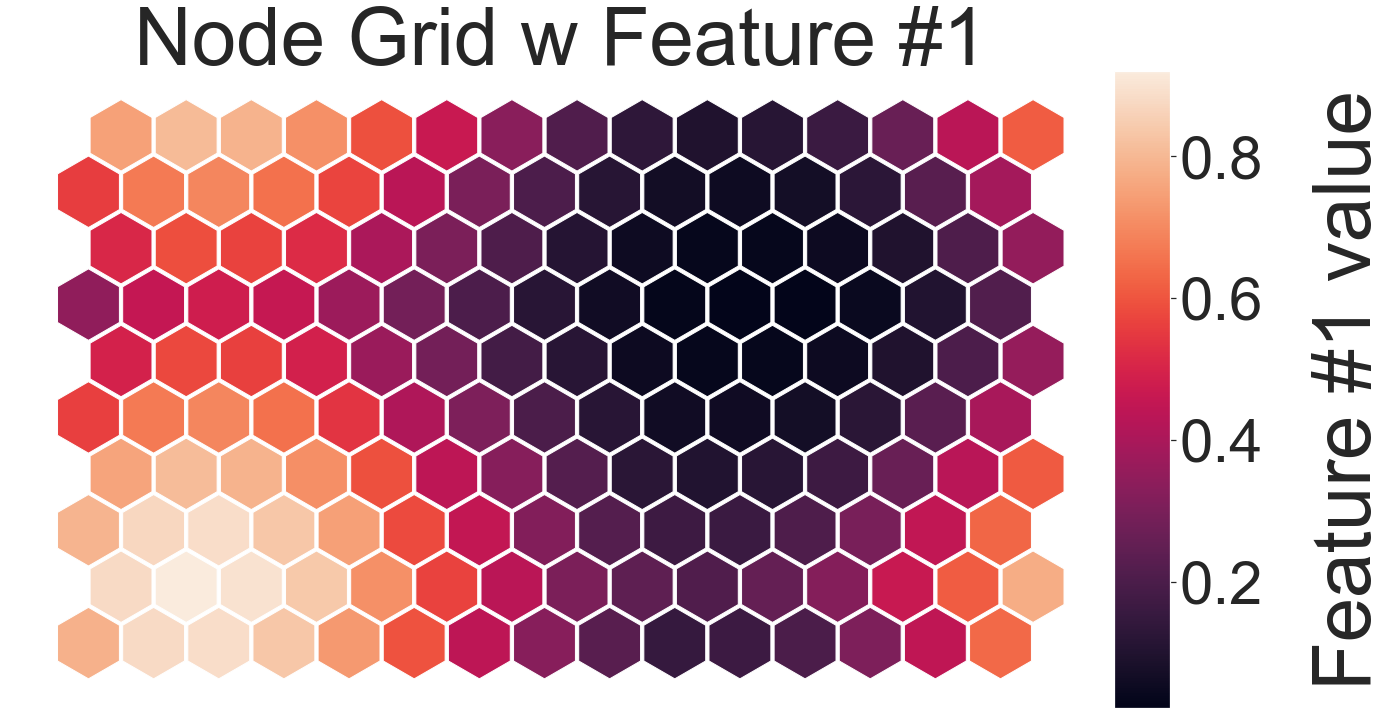

In [25]:
net.nodes_graph(colnum=1)

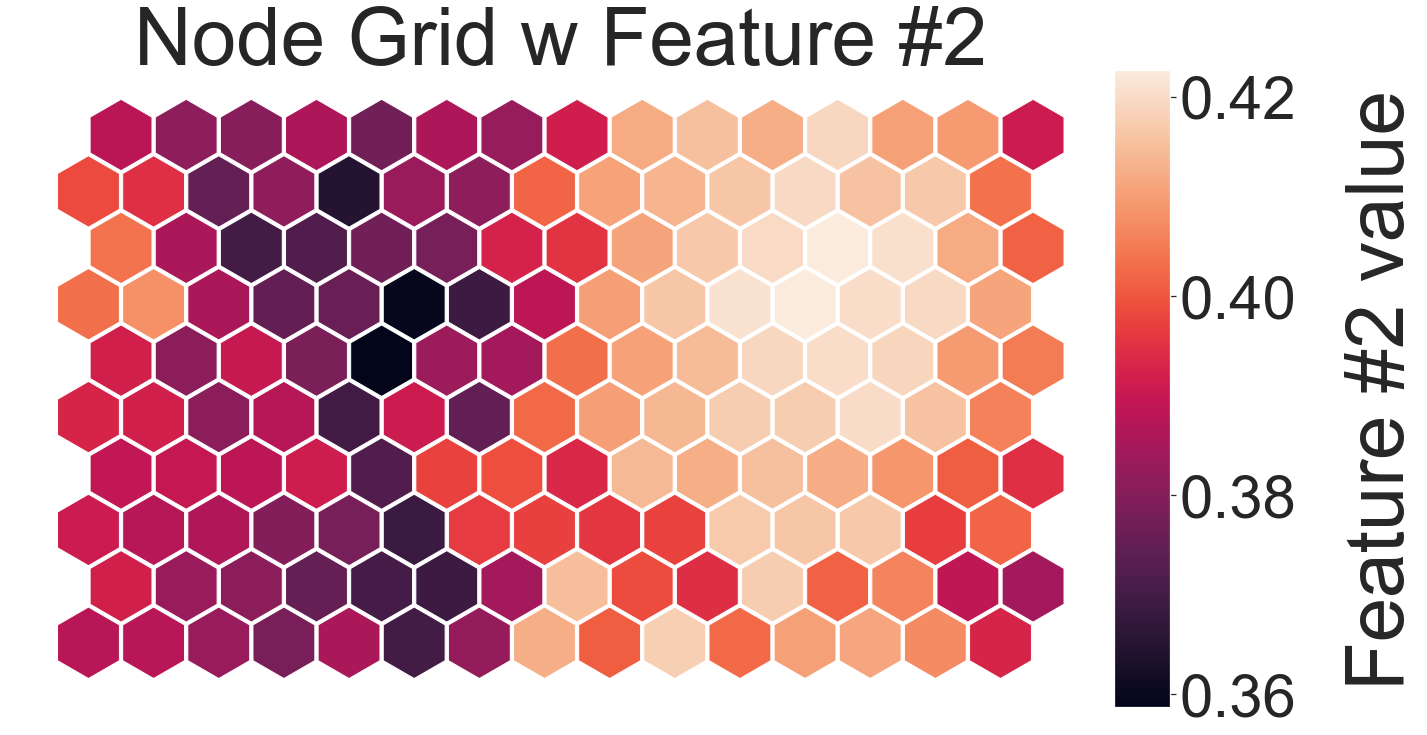

In [26]:
net.nodes_graph(colnum=2)

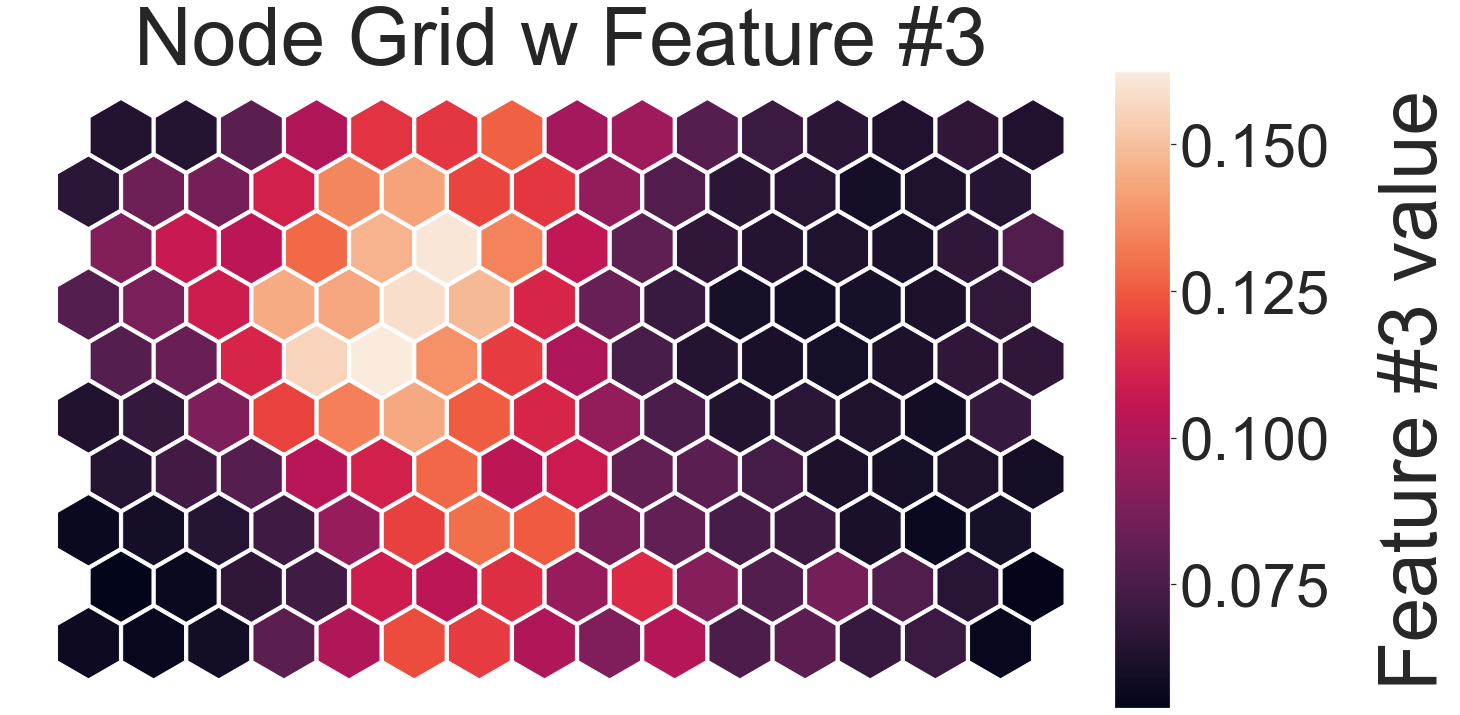

In [27]:
net.nodes_graph(colnum=3)

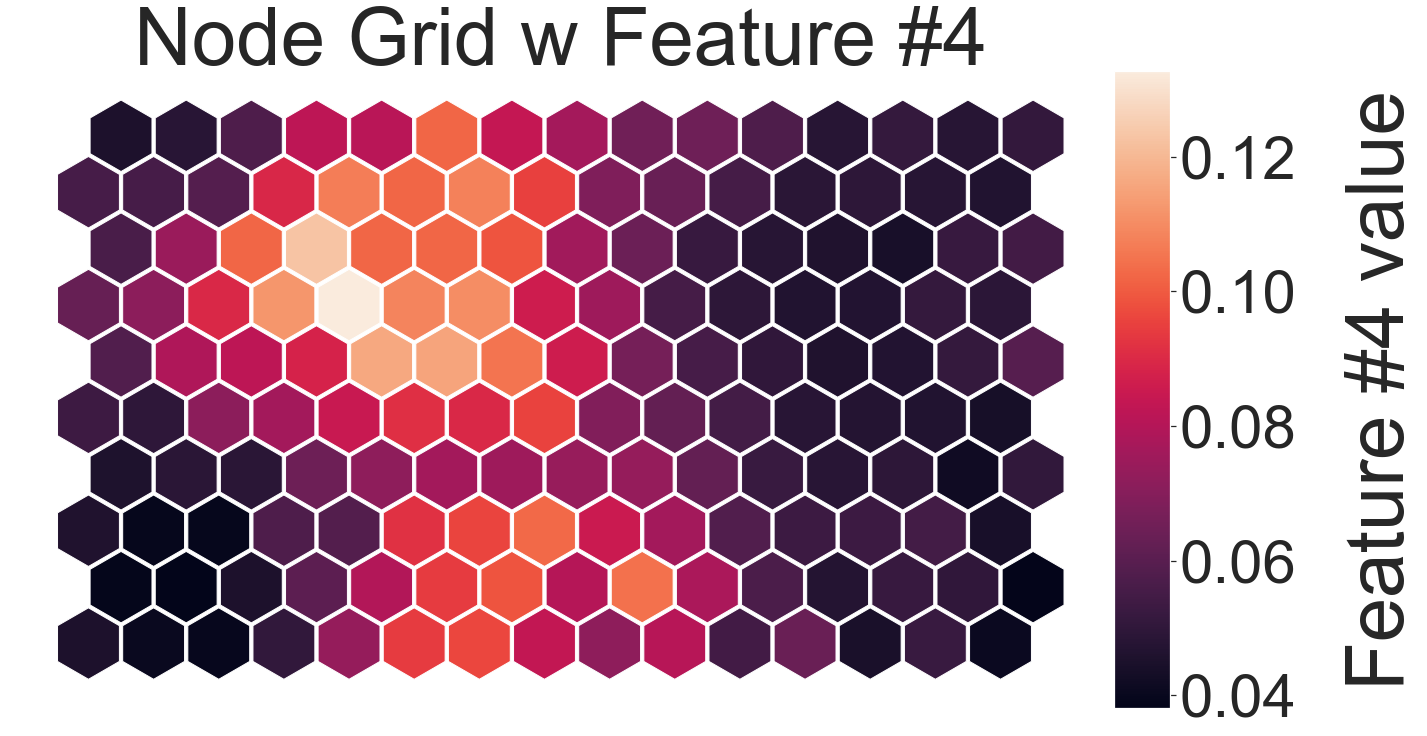

In [28]:
net.nodes_graph(colnum=4)

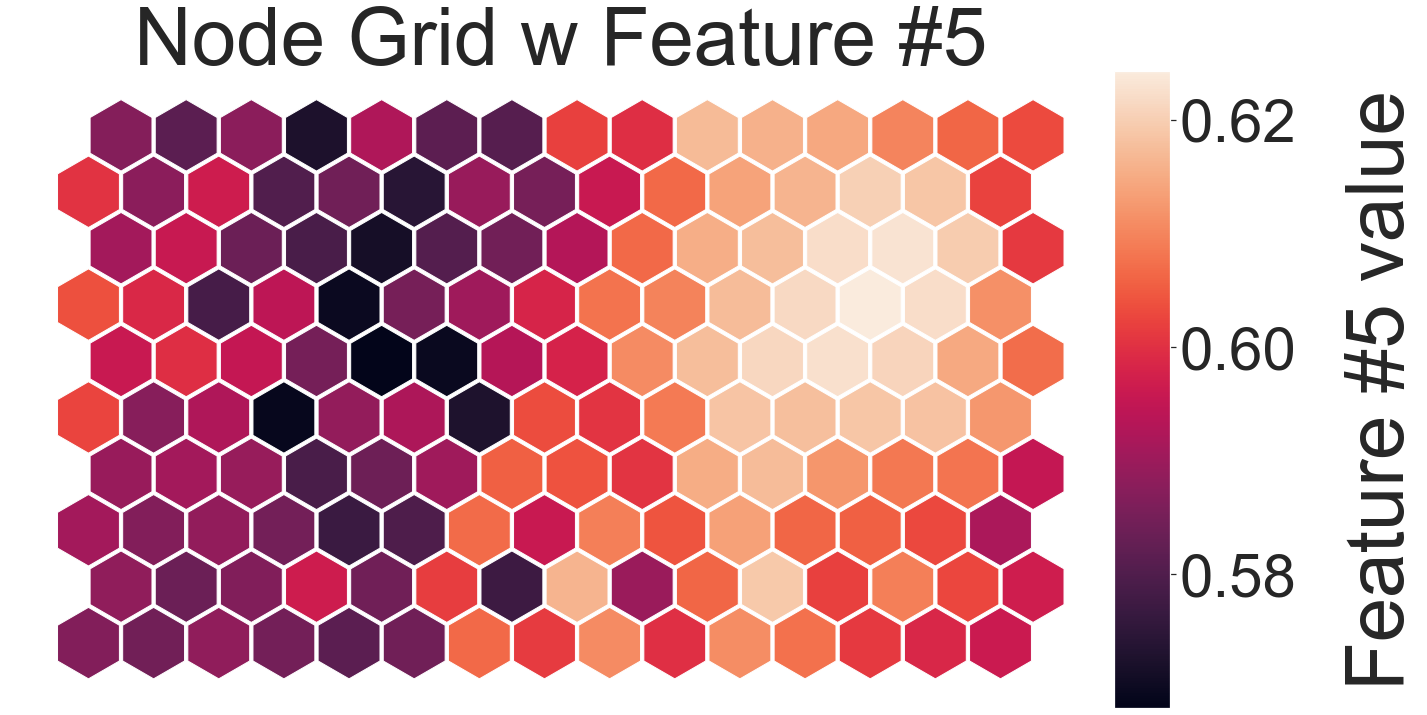

In [29]:
net.nodes_graph(colnum=5)

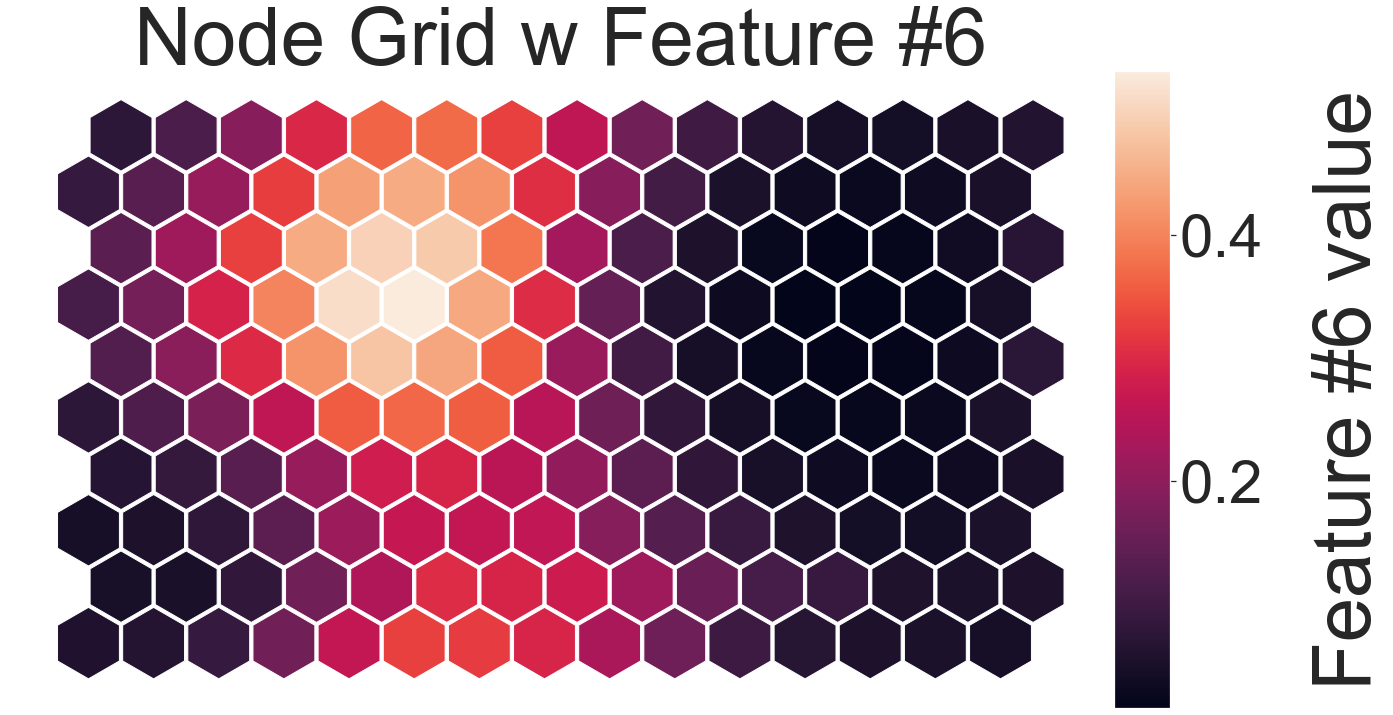

In [30]:
net.nodes_graph(colnum=6)

Для принятия решения о количестве кластеров построим карту удельности весов.

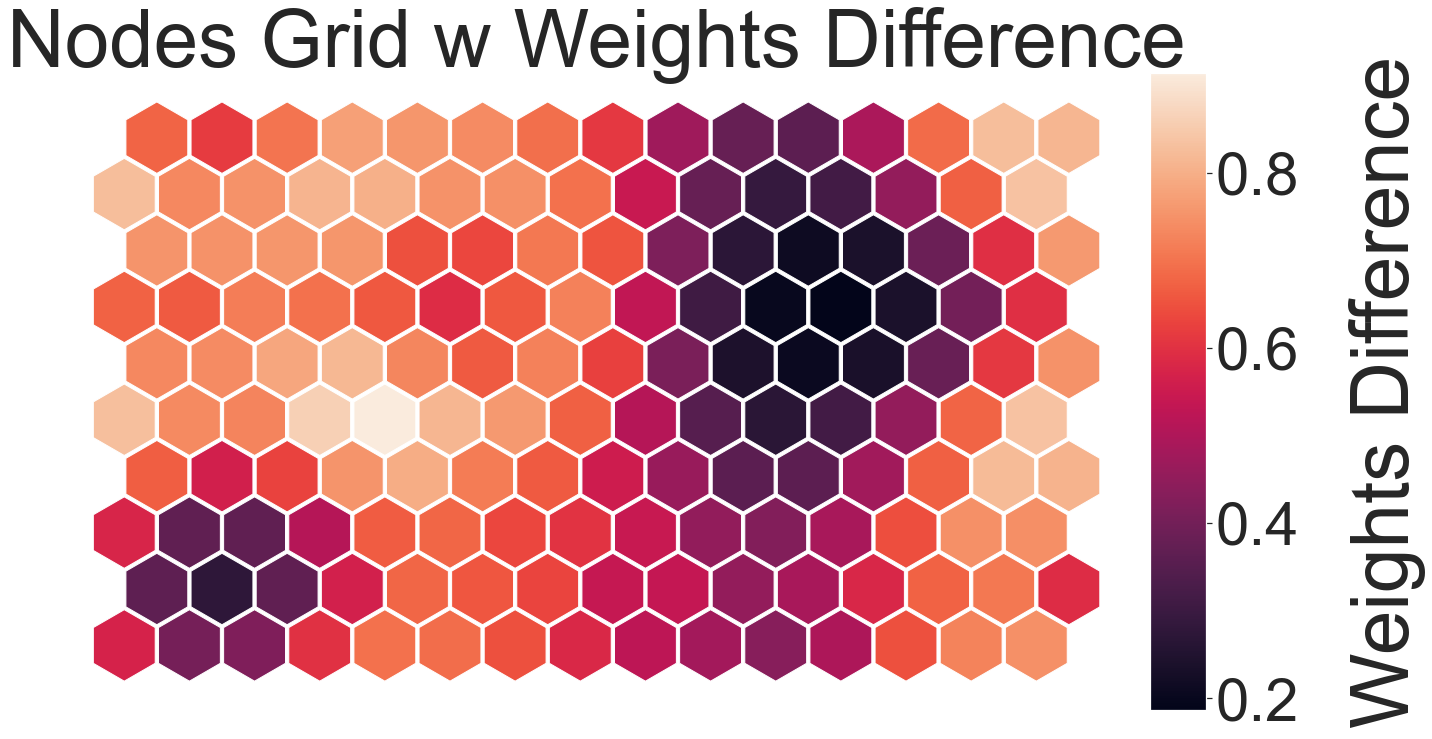

In [31]:
net.diff_graph()

Изобразим узлы карты, где можно условно выделить кластеры

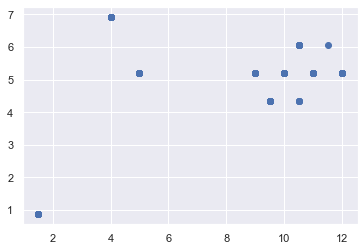

In [32]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Применим к карте алгоритм к-средних. По карте можно выделить три кластера. Обучим нашу карту.

In [33]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

Сопоставим алгоритм К-средних с сетями Кохонена.

In [34]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

1.0

Как видим, результат совпадает на 100%. Это может говорить о том, что мы можем выделить ТРИ кластера.

Итог: выполняя данную работу мы ознакомились с двумя методами разбиения на кластеры: метод К-средних и сети Кохонена. Изначально, используя метод к-средних, я постаралась выделить 4 кластера, но из-за сложности интерпретации мне пришлось удалить из нашей выборки 3 переменных, которые на мой взгляд быди не сильно значимыми. Далее происходила раьота с сетями Кохонена. Исходя из проведенных тестов и мощности техники, я решила оставит размерную сетку 10Х15, т.к. в данном случае мы имеем точные результаты. Также я брала 1500 итераций для обучения, т.к. мы имеем дело с небольшой выборкой данных (всего 615),поэтому данное количество я посчитала достаточным. Когда мы обучили нейронную сеть по таким параметрам, то мы смогли выделить три кластера. Когда мы изменили в методе к-средних количество кластеров с 4х на 3, то мы получили точное совпадение с результатом, полученным с помощью сетей Кохонена. Интерпретация по кластерам сопоставима в обоих методах, поэтому имеем право оставить три кластера. В дополнительном документе проверим метод дерева решений для уточнения результата. 